In [12]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

n = ['D','E','G','H','G-PV','I','JTH','E-PV','F-PV','N-PV'] # apartment names
p = [440, 440,608,608,709,798,798,756,756,774] # rent prices - added 100$ to PV for electricity
units = [5,10,90,132,14,90,210,104,38,84]
rooms = [3,3,2,2,2,2,2,2,2,3]
beds = [units[i]*rooms[i] for i in range(len(units))]
pr = [b/sum(beds) for b in beds]

[0.009041161075422317,
 0.018082322150844633,
 0.10801808232215085,
 0.15822031881989057,
 0.025220080894599095,
 0.10801808232215085,
 0.25196288365453245,
 0.1246728527242446,
 0.04568165596002855,
 0.15108256007613607]

In [13]:
t = [(p[i],pr[i],u_pr[i],n[i]) for i in range(len(p))]
t

[(440, 0.009041161075422317, 0.38, 'D'),
 (440, 0.018082322150844633, 0.76, 'E'),
 (608, 0.10801808232215085, 4.54, 'G'),
 (608, 0.15822031881989057, 6.65, 'H'),
 (709, 0.025220080894599095, 1.06, 'G-PV'),
 (798, 0.10801808232215085, 4.54, 'I'),
 (798, 0.25196288365453245, 10.59, 'JTH'),
 (756, 0.1246728527242446, 5.24, 'E-PV'),
 (756, 0.04568165596002855, 1.92, 'F-PV'),
 (774, 0.15108256007613607, 6.35, 'N-PV')]

Apts: ['G', 'H', 'JTH', 'E-PV'] ; EV: 711.1687638786085 ; prob: 0.2702 , max:  798


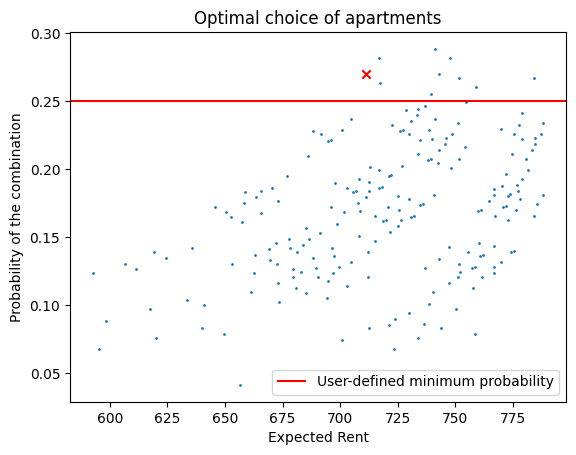

711.1687638786085

In [105]:
def EV(a):
    # function to compute expected value of a combination of apartments
    # parameters:
    # a - combination of apartments
    # returns:
    # ev - expected value of the combination
   
    ev = 0
    s = sum(j for _,j,_,_ in a)
    s_u = sum(x/100 for _,_,x,_ in a)
    for i in a:
        ev += i[0]*(i[1]/s)
    return [ev, s_u]

def min_EV(t,m,pr,show=False):
    '''
    Function to compute the minimum expected value of a combination of apartments
    Parameters:
    t - list of tuples of apartments (price, probability, utility, name)
    m - number of apartments in a combination
    pr - minimum probability of a combination
    show - boolean to show the plot of all combinations
    Returns:
    ev_opt[0] - the choice with minimum expected value

    '''
    comb = np.array(list(itertools.combinations(t, m)), dtype='O')
    e = np.array([EV(i) for i in comb])

    prs = e[:,1]
    evs_all = e[:,0]
    evs = evs_all[prs>pr]
    comb = comb[prs>pr]
    if comb.size == 0:
        print('No combinations with probability greater than ',pr)
        return 0
    
    minEV = np.argmin(evs)
    opt = comb[minEV]
    ev_opt = EV(opt)
    
    if show == True:
        minEV_all = np.where(evs_all == evs[minEV])
        plt.scatter(*zip(*e), s=1.0)
        plt.axhline(y=pr, color='r', linestyle='-', label='User-defined minimum probability')
        plt.scatter(*zip(*e[minEV_all]), color='r', marker='x')
        print('Apts:', [x for _,_,_,x in opt], '; EV:',ev_opt[0],'; prob:',ev_opt[1], ', max: ',max([x for x,_,_,_ in opt]))
        plt.xlabel('Expected Rent')
        plt.ylabel('Probability of the combination')
        plt.title('Optimal choice of apartments')
        plt.legend(loc='lower right')
        plt.show()
    return ev_opt[0]

min_EV(t, 4, 0.25,True)

No combinations with probability greater than  0.28928928928928926


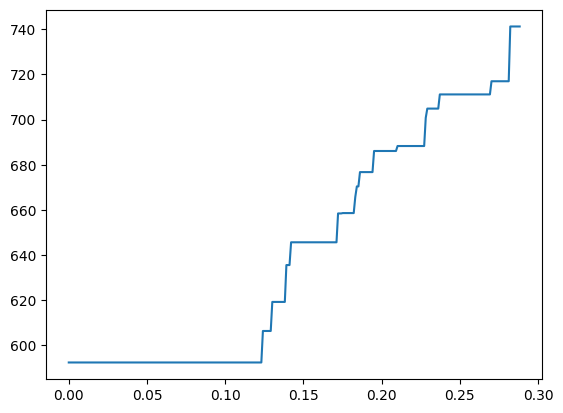

In [99]:
b = []
u = np.linspace(0,1,1000)
for i in u:
    o = min_EV(t, 4, i)
    if o == 0.0:
        x = np.where(u == i)[0][0]
        break
    b.append(o)
plt.plot(u[:x],b)
plt.show()